<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_in_the_works/blob/main/IV_sci5_kni5_json%2Cannotated_Sept27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

In [ ]:
from icevision.all import *

In [ ]:
import icevision
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.9.0a1
torch v 1.8.0+cu101
torchvision v 0.9.0+cu101


In [ ]:
#option 1: git clone
!git clone https://github.com/yrodriguezmd/sci5_kni5_cvat.git
# initially run with no File9, later added

#option 2:
#colab upload

In [ ]:
!ls

'=5.1'	 install_colab.sh   sample_data   sci5_kni5_cvat


In [ ]:
!ls sci5_kni5_cvat/

annotations    File00002.jpg  File00005.jpg  File00008.jpg  README.md
conv2.json     File00003.jpg  File00006.jpg  File00009.jpg
File00001.jpg  File00004.jpg  File00007.jpg  File00010.JPG


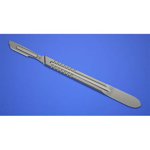

In [178]:
image_path = Path('sci5_kni5_cvat')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[0])
img = img.convert('RGB')

img.to_thumb(150,150)

In [ ]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)
# 80 + background

81

In [220]:
print(class_map.get_by_name('knife'))
print(class_map.get_by_name('scissors'))

44
77


In [ ]:
from icevision.models.checkpoint import *

In [179]:
model_type = models.mmdet.retinanet
backbone = model_type.backbones.resnet50_fpn_1x

In [180]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map), **extra_args) 


/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader


In [181]:
backbone.__dict__

# filename diff on website, file down/uploaded
#retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.10.0/configs/retinanet/retinanet_r50_fpn_1x_coco.py'),
 'model_name': 'retinanet',
 'pretrained': True,
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth'}

In [182]:
model.eval()

imgs_array = [PIL.Image.open(file) for file in img_files]

imgs_array = [image.convert('RGB') for image in imgs_array]

img_size = 384 
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)##

In [183]:
len(imgs_array)
## 10 images in Dataset

10

In [ ]:
#samples = [infer_ds[8] for _ in range(3)]
#show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [184]:
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

#https://github.com/airctic/icevision/blob/9abbb09f47e6fc18867a5aa662885b558af2975c/icevision/models/mmdet/common/bbox/prediction.py
#preds_saved = model_type.predict_from_dl(model, infer_dl, keep_images=True)
## default detection threshold 0.5

  0%|          | 0/3 [00:00<?, ?it/s]

In [185]:
preds_saved = model_type.predict_from_dl(model, infer_dl,
                                          keep_images=True,
                                          detection_threshold = 0.35) ##

  0%|          | 0/3 [00:00<?, ?it/s]

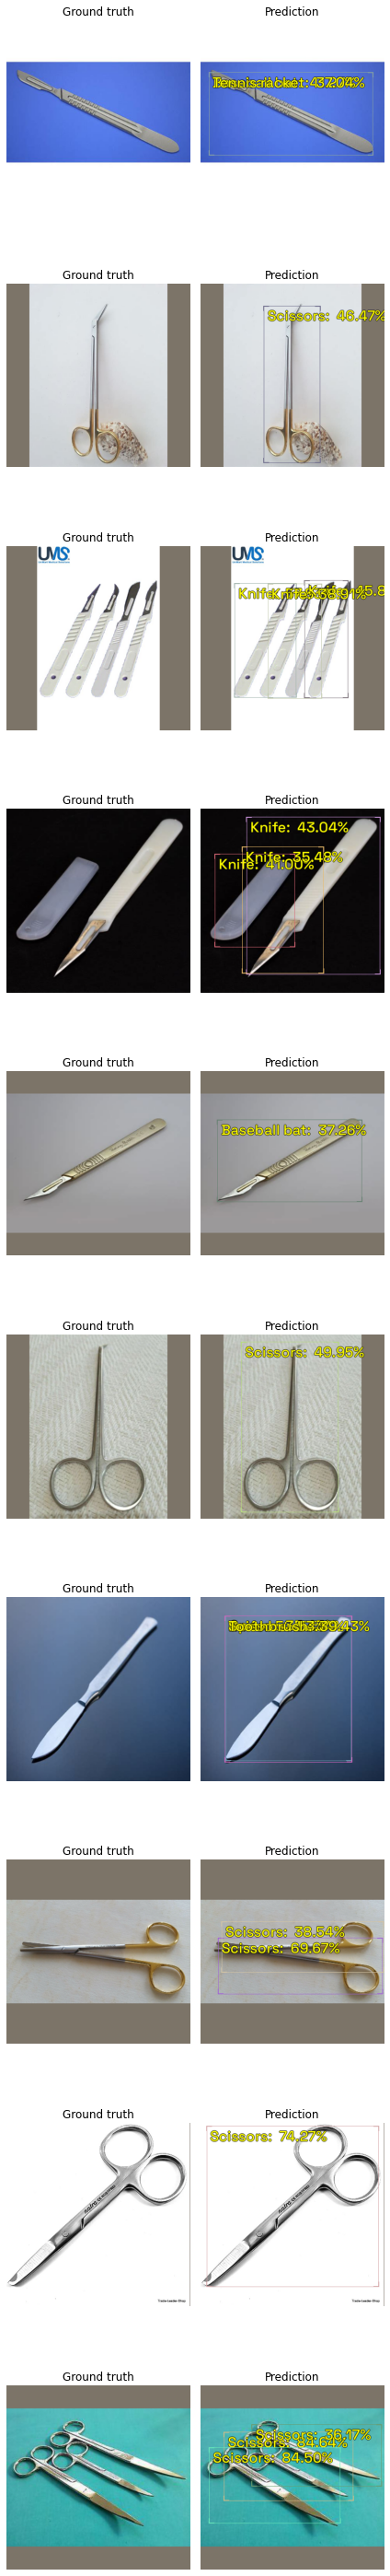

In [187]:
# with lower detection threshold at 0.35,
# all are annotated
show_preds(preds_saved, font_size=30, label_color='#ffff00')
#https://github.com/airctic/icevision/blob/9abbb09f47e6fc18867a5aa662885b558af2975c/icevision/models/mmdet/common/bbox/prediction.py

In [189]:
#preds_saved

In [191]:
preds_saved[1].pred
# alt: preds_saved[1].pred.as_dict
## bboxes in xmin, ymin, xmax, ymax
## no filepath, 
## not equal-sized array
# --> not optimal to use for csv formatting

BaseRecord

common: 
	- Image size ImgSize(width=384, height=384)
	- Img: 384x384x3 <np.ndarray> Image
	- Record ID: 1
detection: 
	- Scores: [    0.46473]
	- BBoxes: [<BBox (xmin:132.63385009765625, ymin:48.06889343261719, xmax:249.42169189453125, ymax:375.77484130859375)>]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana'

In [193]:
# adjusting base record to incorporate filepath
#https://github.com/airctic/icevision/blob/e60c2e2117c012ca5c323088f8577935a87c4f4e/icevision/core/record_components.py
for pred in preds_saved:
  pred.add_component(FilepathRecordComponent())

In [195]:
# adding the filepath for each file after adjusting baserecord
for _ in range(len(preds_saved)):
  preds_saved[_].set_filepath(img_files[_])

In [197]:
conv = convert_preds_to_coco_style(preds_saved)
conv
## bboxes in xmin(x top left), ymin (y top left), w, h
# same as convert_records_to_coco_style(preds_saved)
# https://github.com/airctic/icevision/blob/master/icevision/data/convert_records_to_coco_style.py#L78
# https://github.com/pytorch/vision/blob/master/references/detection/coco_utils.py

{'annotations': [{'area': 59034.17,
   'bbox': [18.001846, 108.64491, 341.38605, 172.92497],
   'category_id': 35,
   'id': 1,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.4127139},
  {'area': 59034.17,
   'bbox': [18.001846, 108.64491, 341.38605, 172.92497],
   'category_id': 39,
   'id': 2,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.37038958},
  {'area': 38272.07,
   'bbox': [132.63385, 48.068893, 116.78784, 327.70593],
   'category_id': 77,
   'id': 3,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.46473128},
  {'area': 30475.336,
   'bbox': [71.59518, 77.5887, 128.17676, 237.76024],
   'category_id': 44,
   'id': 4,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.5782674},
  {'area': 22016.814,
   'bbox': [217.55704, 71.95666, 89.96716, 244.72055],
   'category_id': 44,
   'id': 5,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.45825386},
  {'area': 26447.43,
   'bbox': [141.29425, 78.909386, 110.89404, 238.4928],
   'category_id': 44,
   'id': 6,
   'image_id': 2,
 

In [221]:
## adding 'categories' -- all, coz det threshold lowered
## checked with _CLASSES
conv = {
    "info": {
    "description": "Surgery Instruments",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2021,
    "contributor": "MR",
    "date_created": "2021/09/27"
    },
  "categories": [
                 ## adjusted
    {
      "supercategory": "person",
      "id": 1,
      "name": "person"
    },
    {
      "supercategory": "vehicle",
      "id": 2,
      "name": "bicycle"
    },
    {
      "supercategory": "vehicle",
      "id": 3,
      "name": "car"
    },
    {
      "supercategory": "vehicle",
      "id": 4,
      "name": "motorcycle"
    },
    {
      "supercategory": "vehicle",
      "id": 5,
      "name": "airplane"
    },
    {
      "supercategory": "vehicle",
      "id": 6,
      "name": "bus"
    },
    {
      "supercategory": "vehicle",
      "id": 7,
      "name": "train"
    },
    {
      "supercategory": "vehicle",
      "id": 8,
      "name": "truck"
    },
    {
      "supercategory": "vehicle",
      "id": 9,
      "name": "boat"
    },
    {
      "supercategory": "outdoor",
      "id": 10,
      "name": "traffic light"
    },
    {
      "supercategory": "outdoor",
      "id": 11,
      "name": "fire hydrant"
    },
    {
      "supercategory": "outdoor",
      "id": 12,
      "name": "stop sign"
    },
    {
      "supercategory": "outdoor",
      "id": 13,
      "name": "parking meter"
    },
    {
      "supercategory": "outdoor",
      "id": 14,
      "name": "bench"
    },
    {
      "supercategory": "animal",
      "id": 15,
      "name": "bird"
    },
    {
      "supercategory": "animal",
      "id": 16,
      "name": "cat"
    },
    {
      "supercategory": "animal",
      "id": 17,
      "name": "dog"
    },
    {
      "supercategory": "animal",
      "id": 18,
      "name": "horse"
    },
    {
      "supercategory": "animal",
      "id": 19,
      "name": "sheep"
    },
    {
      "supercategory": "animal",
      "id": 20,
      "name": "cow"
    },
    {
      "supercategory": "animal",
      "id": 21,
      "name": "elephant"
    },
    {
      "supercategory": "animal",
      "id": 22,
      "name": "bear"
    },
    {
      "supercategory": "animal",
      "id": 23,
      "name": "zebra"
    },
    {
      "supercategory": "animal",
      "id": 24,
      "name": "giraffe"
    },
    {
      "supercategory": "accessory",
      "id": 25,
      "name": "backpack"
    },
    {
      "supercategory": "accessory",
      "id": 26,
      "name": "umbrella"
    },
    {
      "supercategory": "accessory",
      "id": 27,
      "name": "handbag"
    },
    {
      "supercategory": "accessory",
      "id": 28,
      "name": "tie"
    },
    {
      "supercategory": "accessory",
      "id": 29,
      "name": "suitcase"
    },
    {
      "supercategory": "sports",
      "id": 30,
      "name": "frisbee"
    },
    {
      "supercategory": "sports",
      "id": 31,
      "name": "skis"
    },
    {
      "supercategory": "sports",
      "id": 32,
      "name": "snowboard"
    },
    {
      "supercategory": "sports",
      "id": 33,
      "name": "sports ball"
    },
    {
      "supercategory": "sports",
      "id": 34,
      "name": "kite"
    },
    {
      "supercategory": "sports",
      "id": 35,
      "name": "baseball bat"
    },
    {
      "supercategory": "sports",
      "id": 36,
      "name": "baseball glove"
    },
    {
      "supercategory": "sports",
      "id": 37,
      "name": "skateboard"
    },
    {
      "supercategory": "sports",
      "id": 38,
      "name": "surfboard"
    },
    {
      "supercategory": "sports",
      "id": 39,
      "name": "tennis racket"
    },
    {
      "supercategory": "kitchen",
      "id": 40,
      "name": "bottle"
    },
    {
      "supercategory": "kitchen",
      "id": 41,
      "name": "wine glass"
    },
    {
      "supercategory": "kitchen",
      "id": 42,
      "name": "cup"
    },
    {
      "supercategory": "kitchen",
      "id": 43,
      "name": "fork"
    },
    {
      "supercategory": "kitchen",
      "id": 44,
      "name": "knife"
    },
    {
      "supercategory": "kitchen",
      "id": 45,
      "name": "spoon"
    },
    {
      "supercategory": "kitchen",
      "id": 46,
      "name": "bowl"
    },
    {
      "supercategory": "food",
      "id": 47,
      "name": "banana"
    },
    {
      "supercategory": "food",
      "id": 48,
      "name": "apple"
    },
    {
      "supercategory": "food",
      "id": 49,
      "name": "sandwich"
    },
    {
      "supercategory": "food",
      "id": 50,
      "name": "orange"
    },
    {
      "supercategory": "food",
      "id": 51,
      "name": "broccoli"
    },
    {
      "supercategory": "food",
      "id": 52,
      "name": "carrot"
    },
    {
      "supercategory": "food",
      "id": 53,
      "name": "hot dog"
    },
    {
      "supercategory": "food",
      "id": 54,
      "name": "pizza"
    },
    {
      "supercategory": "food",
      "id": 55,
      "name": "donut"
    },
    {
      "supercategory": "food",
      "id": 56,
      "name": "cake"
    },
    {
      "supercategory": "furniture",
      "id": 57,
      "name": "chair"
    },
    {
      "supercategory": "furniture",
      "id": 58,
      "name": "couch"
    },
    {
      "supercategory": "furniture",
      "id": 59,
      "name": "potted plant"
    },
    {
      "supercategory": "furniture",
      "id": 60,
      "name": "bed"
    },
    {
      "supercategory": "furniture",
      "id": 61,
      "name": "dining table"
    },
    {
      "supercategory": "furniture",
      "id": 62,
      "name": "toilet"
    },
    {
      "supercategory": "electronic",
      "id": 63,
      "name": "tv"
    },
    {
      "supercategory": "electronic",
      "id": 64,
      "name": "laptop"
    },
    {
      "supercategory": "electronic",
      "id": 65,
      "name": "mouse"
    },
    {
      "supercategory": "electronic",
      "id": 66,
      "name": "remote"
    },
    {
      "supercategory": "electronic",
      "id": 67,
      "name": "keyboard"
    },
    {
      "supercategory": "electronic",
      "id": 68,
      "name": "cell phone"
    },
    {
      "supercategory": "appliance",
      "id": 69,
      "name": "microwave"
    },
    {
      "supercategory": "appliance",
      "id": 70,
      "name": "oven"
    },
    {
      "supercategory": "appliance",
      "id": 71,
      "name": "toaster"
    },
    {
      "supercategory": "appliance",
      "id": 72,
      "name": "sink"
    },
    {
      "supercategory": "appliance",
      "id": 73,
      "name": "refrigerator"
    },
    {
      "supercategory": "indoor",
      "id": 74,
      "name": "book"
    },
    {
      "supercategory": "indoor",
      "id": 75,
      "name": "clock"
    },
    {
      "supercategory": "indoor",
      "id": 76,
      "name": "vase"
    },
    {
      "supercategory": "indoor",
      "id": 77,
      "name": "scissors"
    },
    {
      "supercategory": "indoor",
      "id": 78,
      "name": "teddy bear"
    },
    {
      "supercategory": "indoor",
      "id": 79,
      "name": "hair drier"
    },
    {
      "supercategory": "indoor",
      "id": 80,
      "name": "toothbrush"
    }
    ],
    
   # {
    'annotations': [{'area': 59034.17,
   'bbox': [18.001846, 108.64491, 341.38605, 172.92497],
   'category_id': 35,
   'id': 1,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.4127139},
  {'area': 59034.17,
   'bbox': [18.001846, 108.64491, 341.38605, 172.92497],
   'category_id': 39,
   'id': 2,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.37038958},
  {'area': 38272.07,
   'bbox': [132.63385, 48.068893, 116.78784, 327.70593],
   'category_id': 77,
   'id': 3,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.46473128},
  {'area': 30475.336,
   'bbox': [71.59518, 77.5887, 128.17676, 237.76024],
   'category_id': 44,
   'id': 4,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.5782674},
  {'area': 22016.814,
   'bbox': [217.55704, 71.95666, 89.96716, 244.72055],
   'category_id': 44,
   'id': 5,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.45825386},
  {'area': 26447.43,
   'bbox': [141.29425, 78.909386, 110.89404, 238.4928],
   'category_id': 44,
   'id': 6,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.38910946},
  {'area': 91190.4,
   'bbox': [96.41266, 17.20842, 277.7328, 328.33862],
   'category_id': 44,
   'id': 7,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.43044895},
  {'area': 32284.871,
   'bbox': [30.732689, 94.1099, 165.98575, 194.50388],
   'category_id': 44,
   'id': 8,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.41000953},
  {'area': 44685.47,
   'bbox': [87.188255, 79.54178, 169.00223, 264.40756],
   'category_id': 44,
   'id': 9,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.35482535},
  {'area': 51308.1,
   'bbox': [35.762375, 101.5867, 300.5879, 170.6925],
   'category_id': 35,
   'id': 10,
   'image_id': 4,
   'iscrowd': 0,
   'score': 0.37260798},
  {'area': 71697.71,
   'bbox': [85.69525, 15.088776, 201.62054, 355.60718],
   'category_id': 77,
   'id': 11,
   'image_id': 5,
   'iscrowd': 0,
   'score': 0.4994901},
  {'area': 80640.82,
   'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
   'category_id': 44,
   'id': 12,
   'image_id': 6,
   'iscrowd': 0,
   'score': 0.52265227},
  {'area': 78800.195,
   'bbox': [53.487717, 39.034866, 260.65845, 302.31207],
   'category_id': 45,
   'id': 13,
   'image_id': 6,
   'iscrowd': 0,
   'score': 0.3542725},
  {'area': 80640.82,
   'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
   'category_id': 77,
   'id': 14,
   'image_id': 6,
   'iscrowd': 0,
   'score': 0.53144747},
  {'area': 80640.82,
   'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
   'category_id': 80,
   'id': 15,
   'image_id': 6,
   'iscrowd': 0,
   'score': 0.3943466},
  {'area': 39972.508,
   'bbox': [37.142258, 163.946, 342.0736, 116.85353],
   'category_id': 77,
   'id': 16,
   'image_id': 7,
   'iscrowd': 0,
   'score': 0.6966674},
  {'area': 35838.59,
   'bbox': [44.962494, 129.10951, 336.23972, 106.586426],
   'category_id': 77,
   'id': 17,
   'image_id': 7,
   'iscrowd': 0,
   'score': 0.38543963},
  {'area': 120378.16,
   'bbox': [13.125687, 8.169327, 358.65936, 335.63367],
   'category_id': 77,
   'id': 18,
   'image_id': 8,
   'iscrowd': 0,
   'score': 0.7426905},
  {'area': 38247.254,
   'bbox': [49.334137, 97.97959, 269.0333, 142.1655],
   'category_id': 77,
   'id': 19,
   'image_id': 9,
   'iscrowd': 0,
   'score': 0.8464},
  {'area': 43100.16,
   'bbox': [18.595276, 129.5695, 273.36746, 157.66383],
   'category_id': 77,
   'id': 20,
   'image_id': 9,
   'iscrowd': 0,
   'score': 0.84499955},
  {'area': 34661.324,
   'bbox': [107.409, 81.877174, 270.4337, 128.1694],
   'category_id': 77,
   'id': 21,
   'image_id': 9,
   'iscrowd': 0,
   'score': 0.361674}],
 'images': [{'file_name': 'File00001.jpg',
   'height': 384,
   'id': 0,
   'width': 384},
  {'file_name': 'File00002.jpg', 'height': 384, 'id': 1, 'width': 384},
  {'file_name': 'File00003.jpg', 'height': 384, 'id': 2, 'width': 384},
  {'file_name': 'File00004.jpg', 'height': 384, 'id': 3, 'width': 384},
  {'file_name': 'File00005.jpg', 'height': 384, 'id': 4, 'width': 384},
  {'file_name': 'File00006.jpg', 'height': 384, 'id': 5, 'width': 384},
  {'file_name': 'File00007.jpg', 'height': 384, 'id': 6, 'width': 384},
  {'file_name': 'File00008.jpg', 'height': 384, 'id': 7, 'width': 384},
  {'file_name': 'File00009.jpg', 'height': 384, 'id': 8, 'width': 384},
  {'file_name': 'File00010.JPG', 'height': 384, 'id': 9, 'width': 384}]}

In [223]:
## saving dictionary as json file
f = open('conv.json','w')
f.write(str(conv))
f.close()

In [ ]:
# opened json in text editor, replaced ' with "
# upload in colab

In [201]:
#!ls

In [224]:
# in vscode/ text editor, replace ' with "
annot = Path('conv_.json')

In [226]:
parser = parsers.COCOBBoxParser(
    annotations_filepath = annot,
    img_dir = Path('/content/sci5_kni5_cvat/',
    mask =False)
)

In [227]:
train_records, valid_records = parser.parse() # default autofix=True
# autofix clipping based on xmin, ymin, xmax, ymax instead of xywh

  0%|          | 0/21 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/10 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 9) - Clipping bbox xmax from 318.367437 to image width 300 (Before: <BBox (xmin:49.334137, ymin:97.97959, xmax:318.367437, ymax:240.14509)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 9) - Clipping bbox ymax from 240.14509 to image height 225 (Before: <BBox (xmin:49.334137, ymin:97.97959, xmax:300, ymax:240.14509)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 9) - Clipping bbox ymax from 287.23333 to image height 225 (Before: <BBox (xmin:18.595276, ymin:129.5695, xmax:291.962736, ymax:287.23333)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 9) - Clipping bbox xmax from 377.8427 to image width 300 (Before: <BBox (xmin:107.409, ymin:81.877174, xmax:377.8427, ymax:210.046574)>) | icevision.utils.logger_utils:autofix_log:17


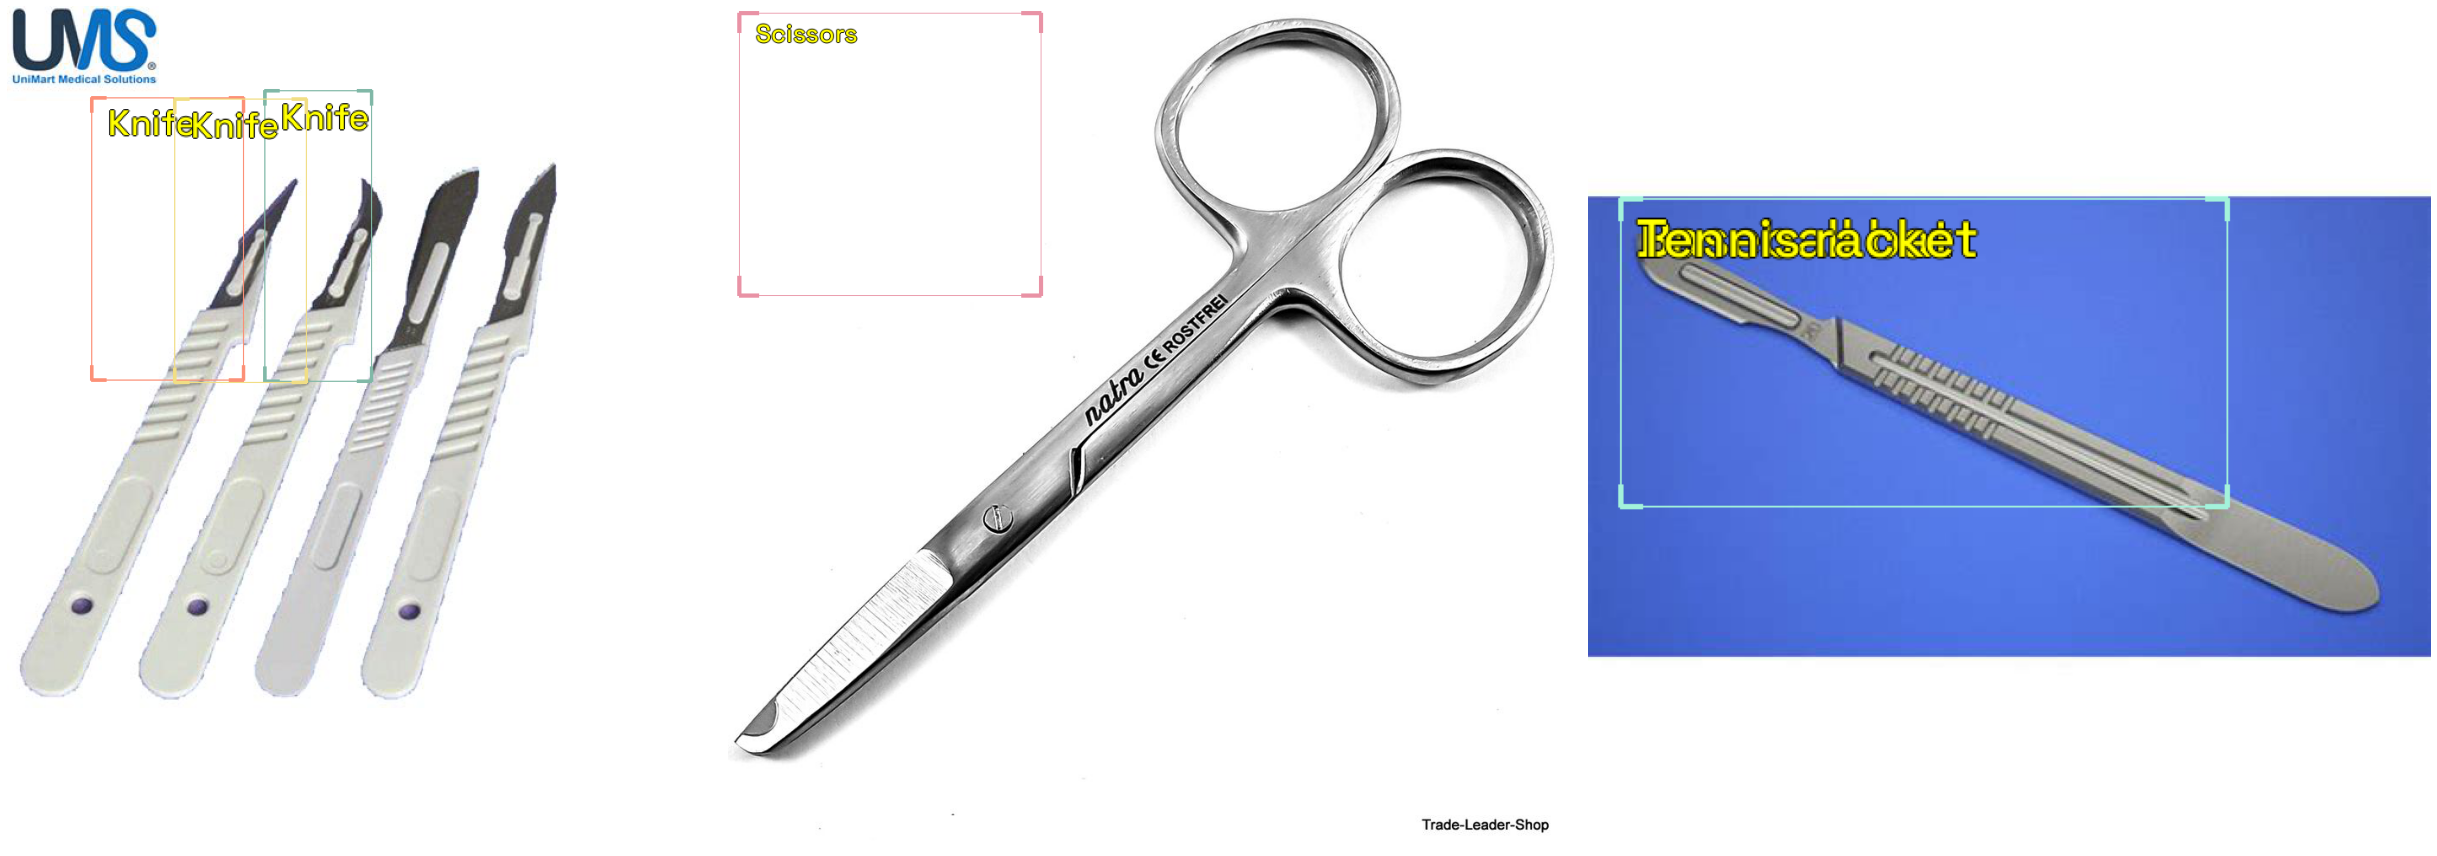

In [228]:
show_records(train_records[:3],ncols=3, font_size=30, label_color = '#ffff00')

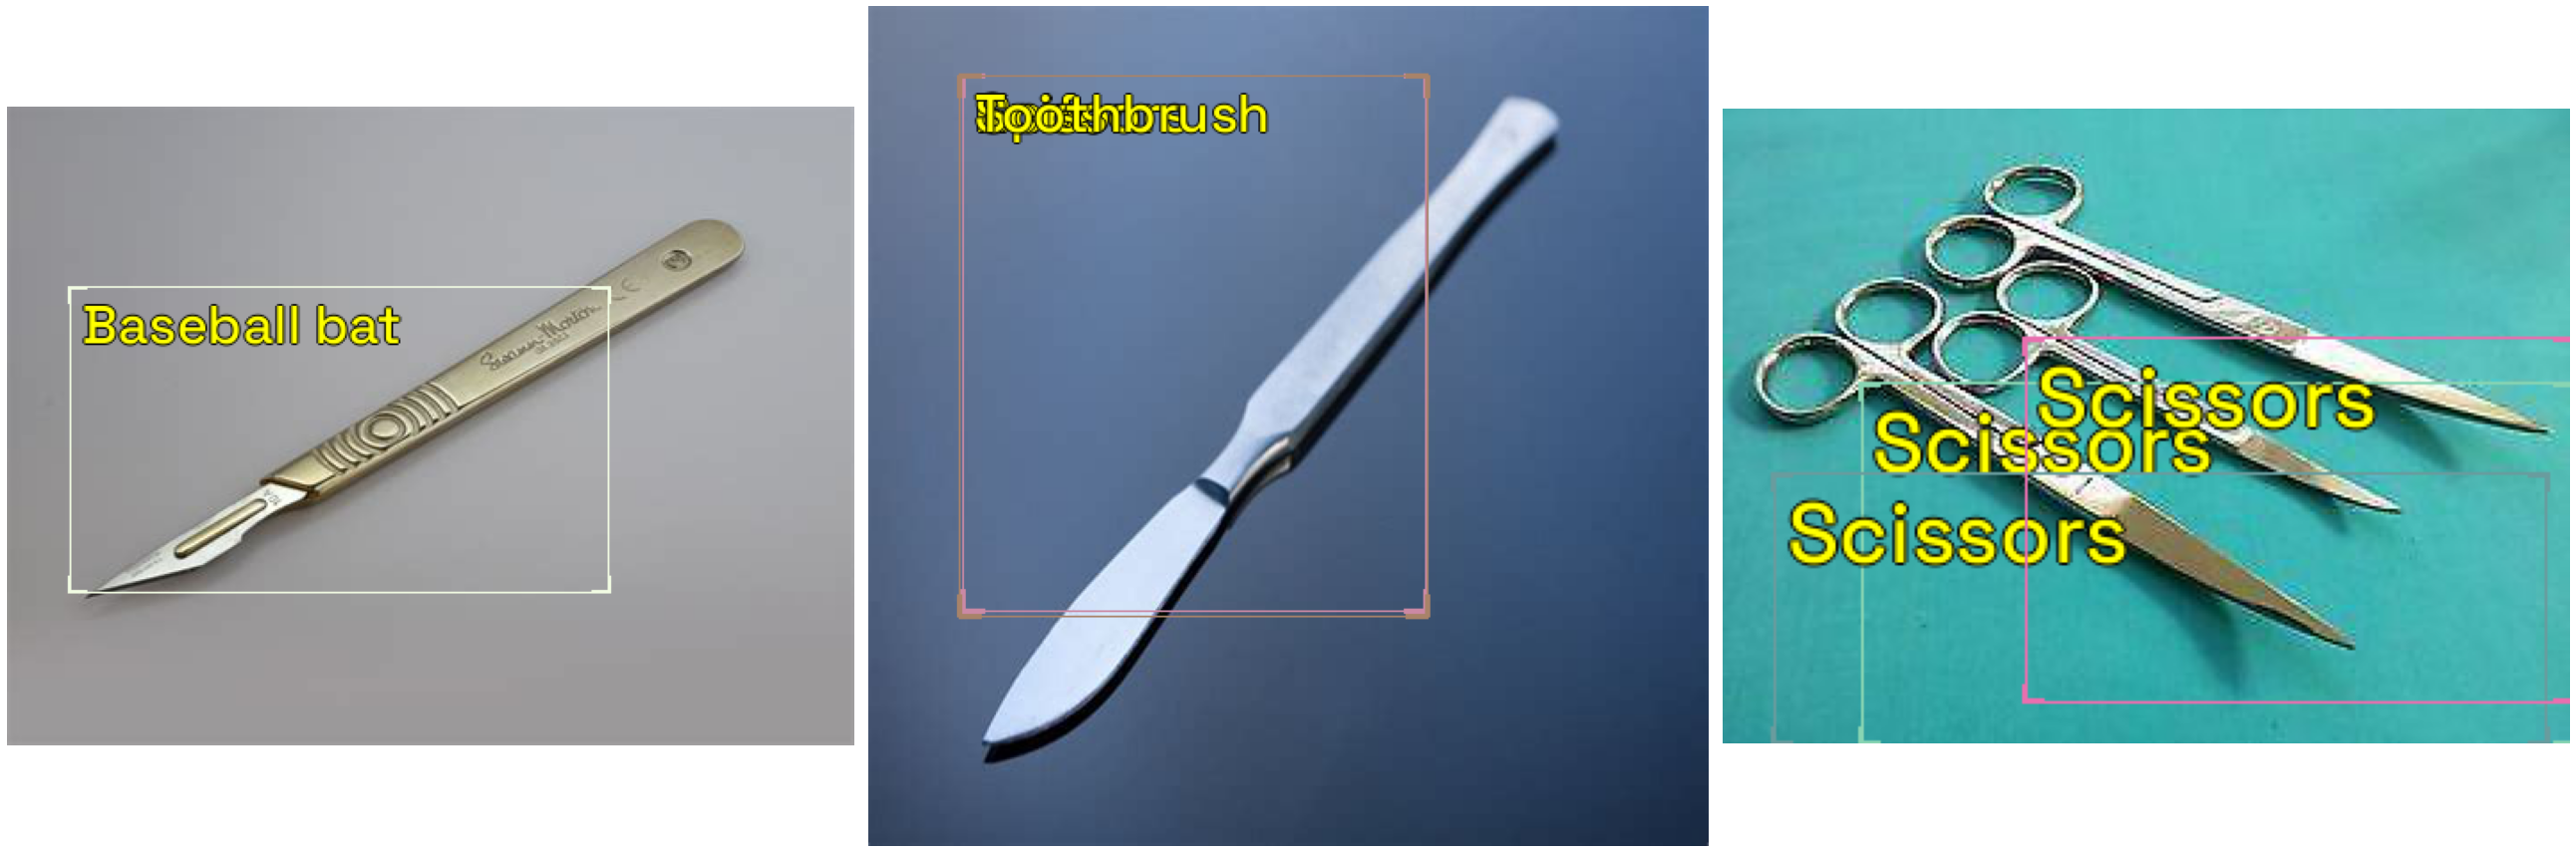

In [230]:
show_records(train_records[3:6],ncols=3, font_size=30, label_color = '#ffff00')

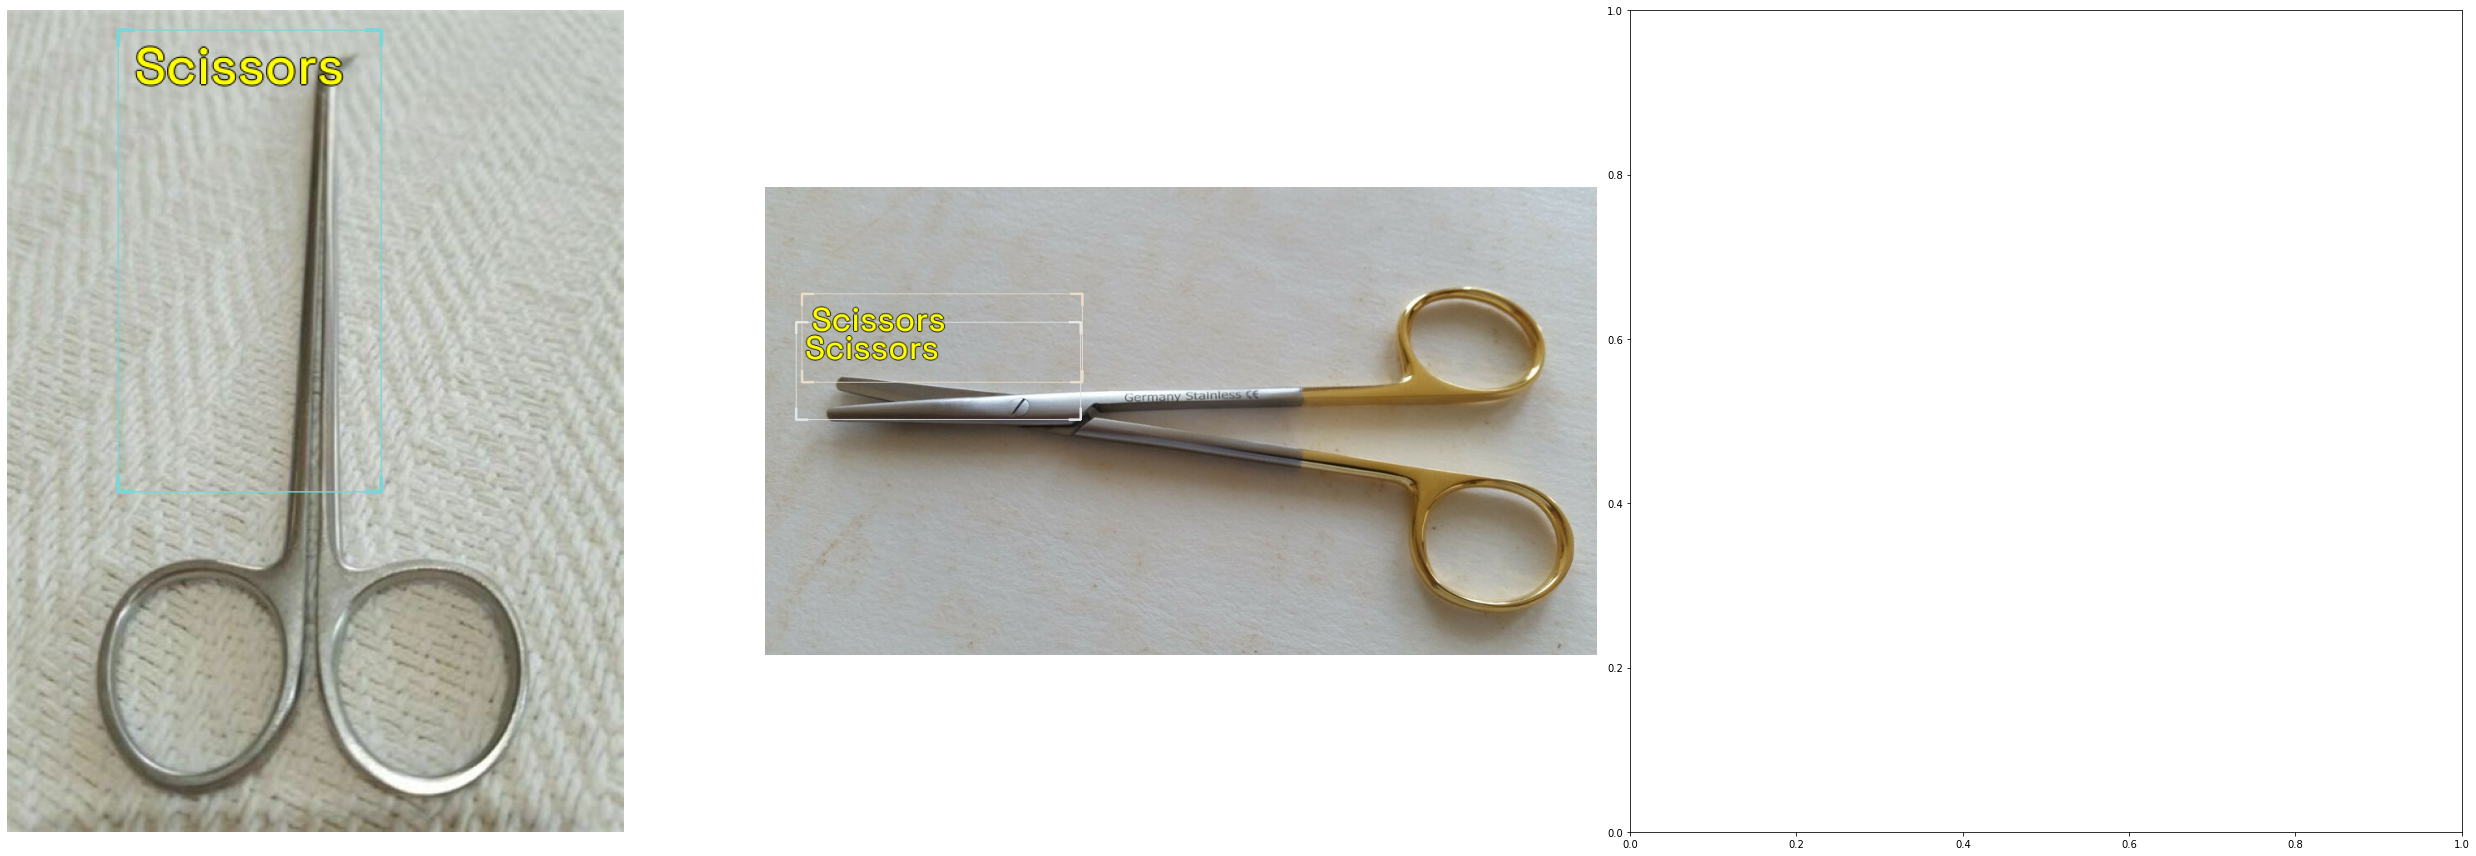

In [232]:
show_records(train_records[6:],ncols=3, font_size=40, label_color = '#ffff00')

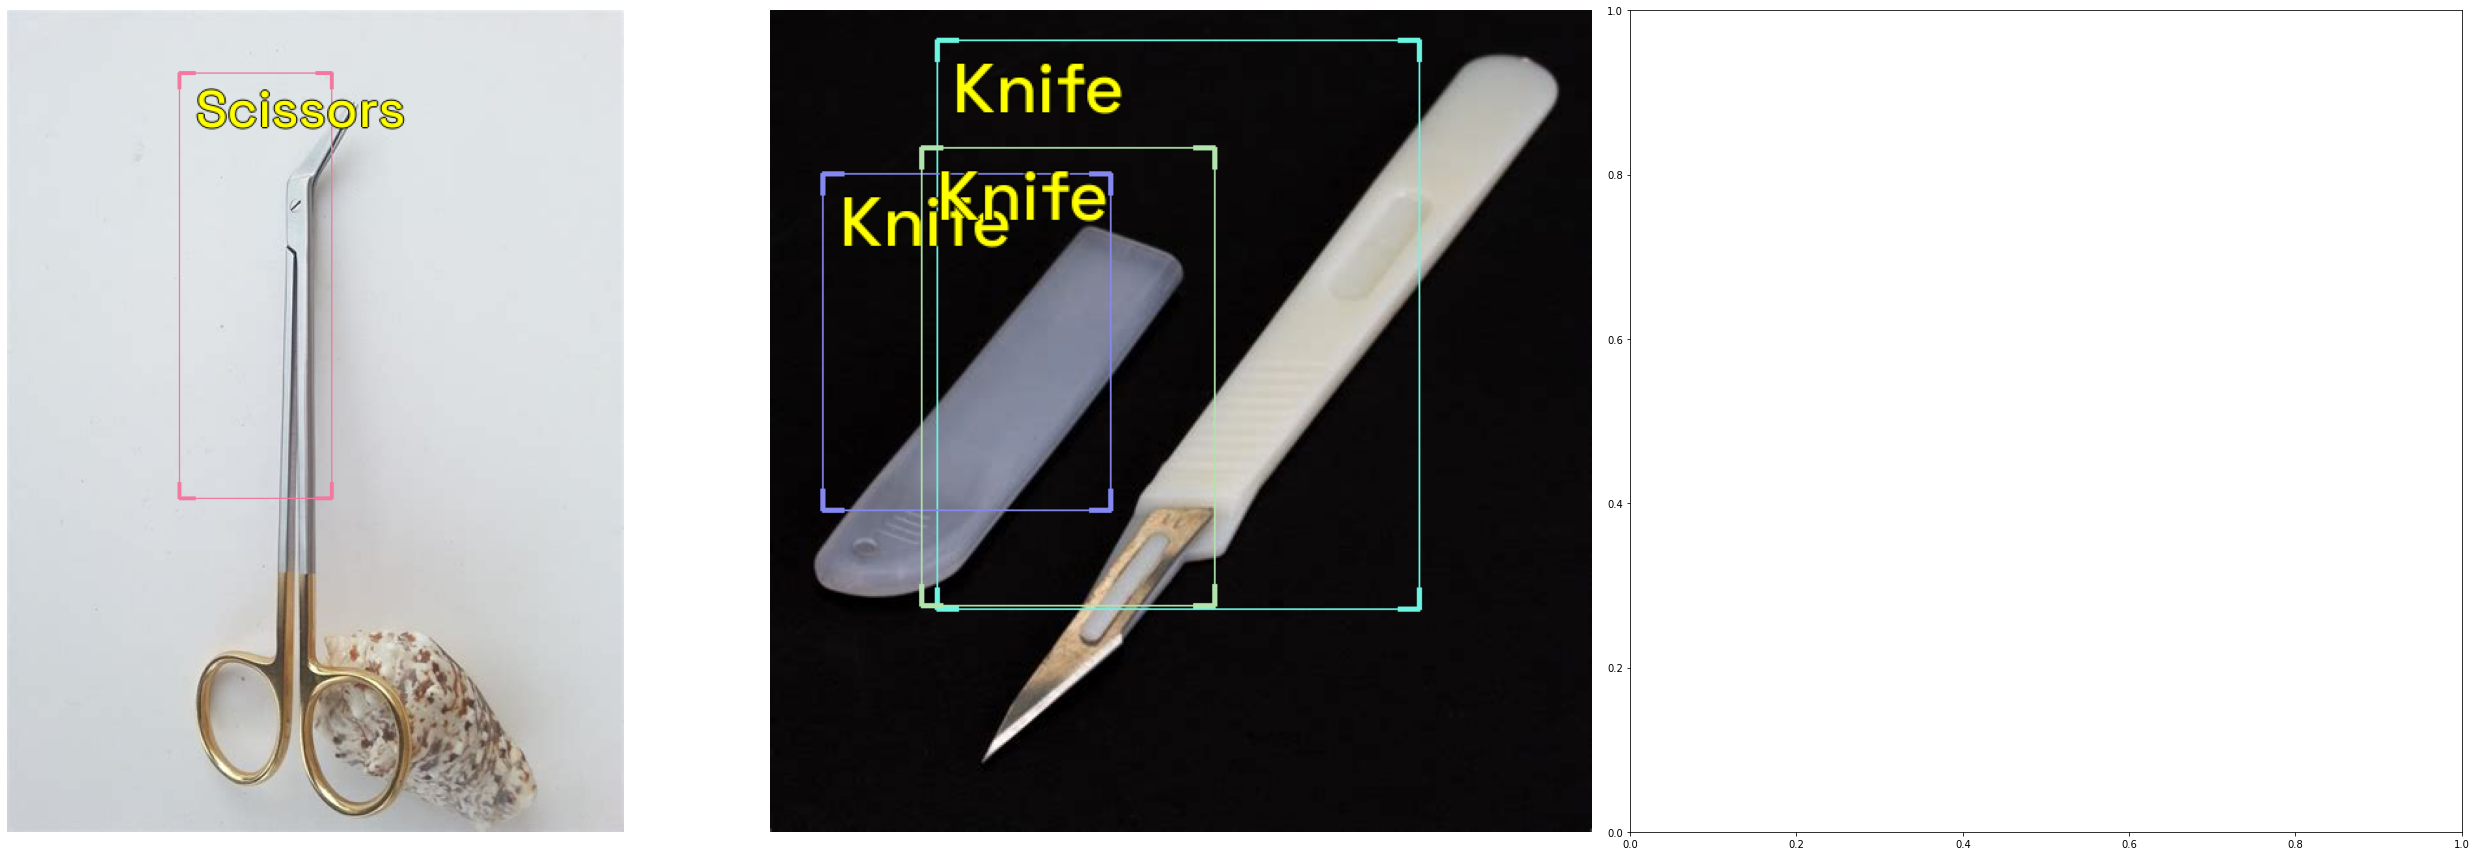

In [234]:
show_records(valid_records[:3],ncols=3, font_size=40, label_color = '#ffff00')

In [ ]:
## with the detection threshold decreased, records now show all images,

In [ ]:
# images and json loaded to roboflow
# annotations adjusted
# generated set
# downloaded using coco json

In [ ]:
## try if with detection threshold 0.5
# more cumbersome to create new bboxes than to adjust
#  --> use det thresh 0.35

In [235]:
#!ls

In [253]:
!ls annotated
# only from train set provided by roboflow
# plus 20 unlabelled data

_annotations.coco.json	File00024.jpg
File00011.jpg		File00025.jpg
File00012.jpg		File00026.jpg
File00013.jpg		File00027.JPG
File00014.jpg		File00028.jpg
File00015.jpg		File00029.jpg
File00016.jpg		File00030.jpg
File00017.jpg		File10_JPG.rf.506346e6f18b5e65741b4cbadd11b808.jpg
File00018.jpg		File1_jpg.rf.33ab8396e524551a72f16674879d381e.jpg
File00019.jpg		File2_jpg.rf.beecad5c77b8f582432a589035c36330.jpg
File00020.jpg		File4_jpg.rf.987990c483c902eeef890f1afe4068d2.jpg
File00021.jpg		File5_jpg.rf.eee3956f6a65201c999f822339603824.jpg
File00022.jpg		File7_jpg.rf.9e06046bf11a75e27ac330af6bfe04f5.jpg
File00023.jpg		File8_jpg.rf.0c341ad007fdafa23468ccfae300e33c.jpg


In [249]:
%pwd

'/content'

In [278]:
image_path2 = Path('/content/annotated')

annotations_filepath = Path('/content/annotated/_annotations.coco.json')

#parser = parsers.COCOBBoxParser(
#    annotations_filepath = Path('/content/annotated/_annotations.coco.json'),
#    img_dir = Path('/content/annotated'),
#    mask=False)


parser = parsers.COCOBBoxParser(
    annotations_filepath = annotations_filepath,
    img_dir = Path('/content/annotated/',mask =False))


#img_files2 = get_image_files(image_path2)

#img_size = 384 

#valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

#imgs_array2 = [PIL.Image.open(file) for file in img_files2]

#infer_ds = Dataset.from_images(imgs_array2, valid_tfms, class_map = class_map)

In [279]:
train_records, valid_records = parser.parse()

0it [00:00, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


0it [00:00, ?it/s]

In [280]:
show_record(train_records[1], font_size=30, label_color = '#ffff00')

IndexError: ignored